# Import and Setup

In [2]:
import datetime as dt
import pandas as pd
import numpy as np
import sys
import matplotlib

import matplotlib.pyplot as plt
plt.style.use('../../style.mplstyle')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

sys.path.insert(0, '../../../purity-monitor/')
sys.path.insert(0, '../../WaveformAnalysis/')
import Dataset as Dataset
import StandMonitor as Monitor
import PlotFunctions as Plt
import importlib
importlib.reload(Dataset)
importlib.reload(Monitor)
importlib.reload(Plt)

<module 'PlotFunctions' from '../../WaveformAnalysis\\PlotFunctions.py'>

# Data Read-In

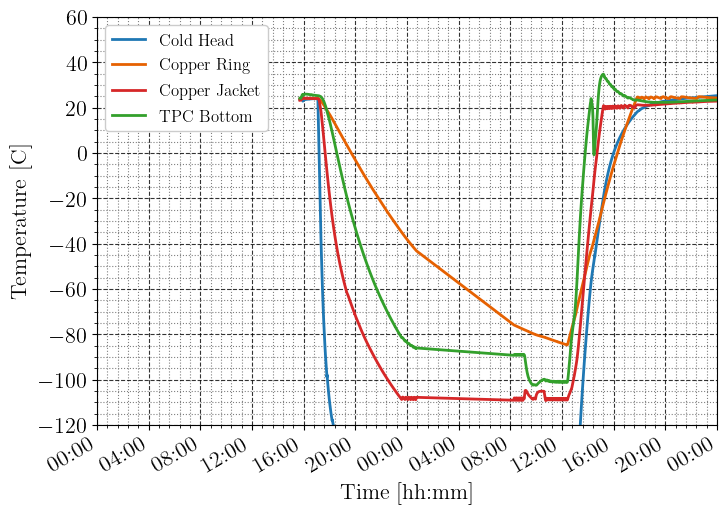

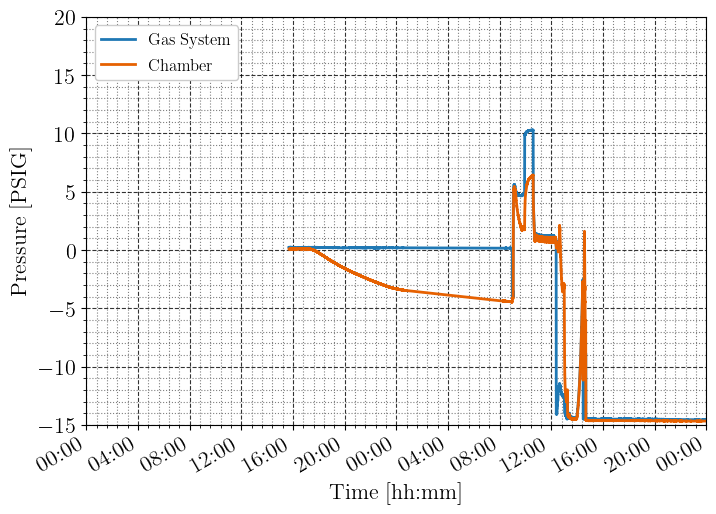

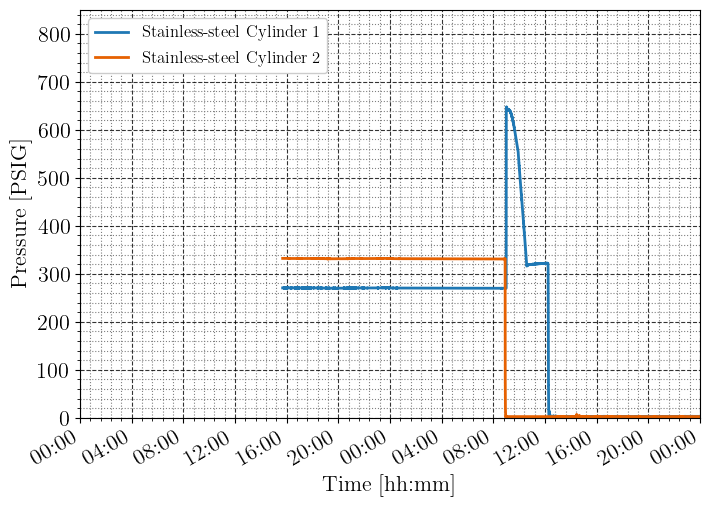

In [3]:
Sensors = []
Files = ['C:/Data/StandStatus/20210609.h5','C:/Data/StandStatus/20210610.h5']
for File in Files: 
    Sensor = Monitor.SensorData(Filepath=File)
    Sensor.GetData()
    Sensors.append(Sensor)

AllSensors = Monitor.SensorData()
AllSensors.Combine(Sensors)
XRange = [dt.datetime(2021,6,9,0,0), dt.datetime(2021,6,11,0,0)]
 
AllSensors.PlotData(Data=AllSensors.Temp, Selection='Temperature', XTicks=240, YTicks=20, XRange=XRange, YRange=[-120,60])
AllSensors.PlotData(Data=AllSensors.SPressure, Selection='System Pressure', XTicks=240, YTicks=5, XRange=XRange, YRange=[-15,20])
AllSensors.PlotData(Data=AllSensors.XPressure, Selection='Xenon Pressure', XTicks=240, YTicks=100, XRange=XRange, YRange=[0,850])

Charge Collection [%]: 158.91 +- 5.07
Drift time [us]: 20.56
Electron lifetime [us]: -47.73  - -41.58


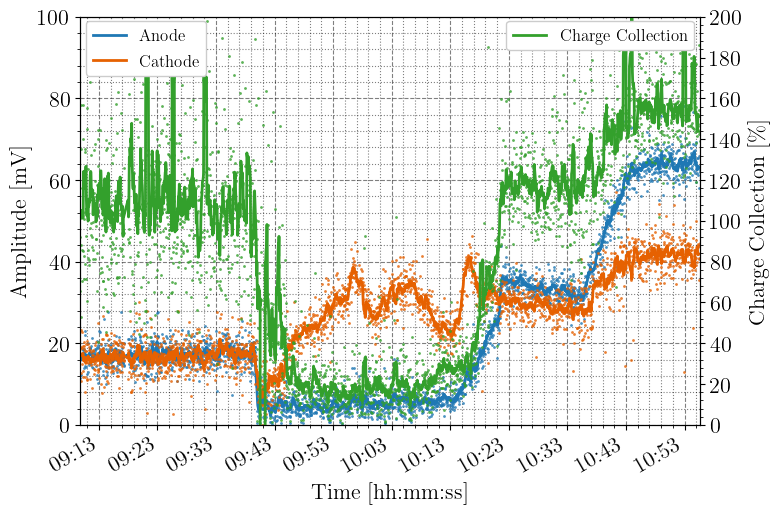

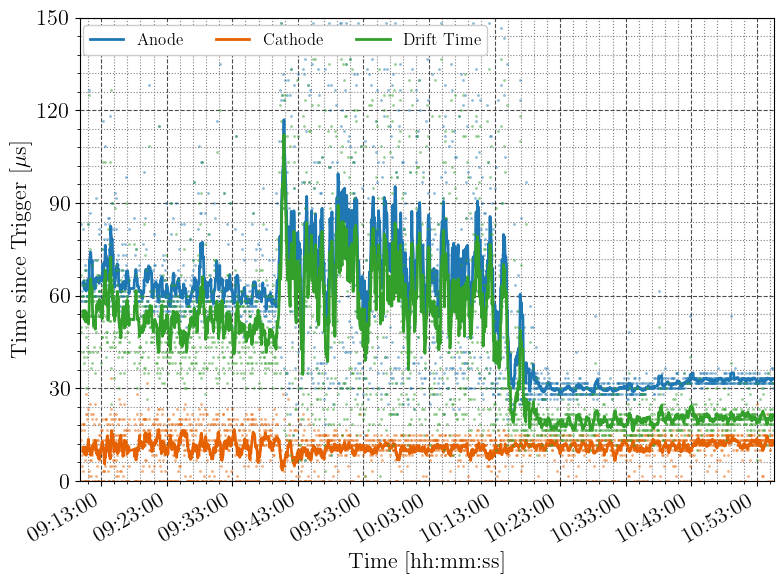

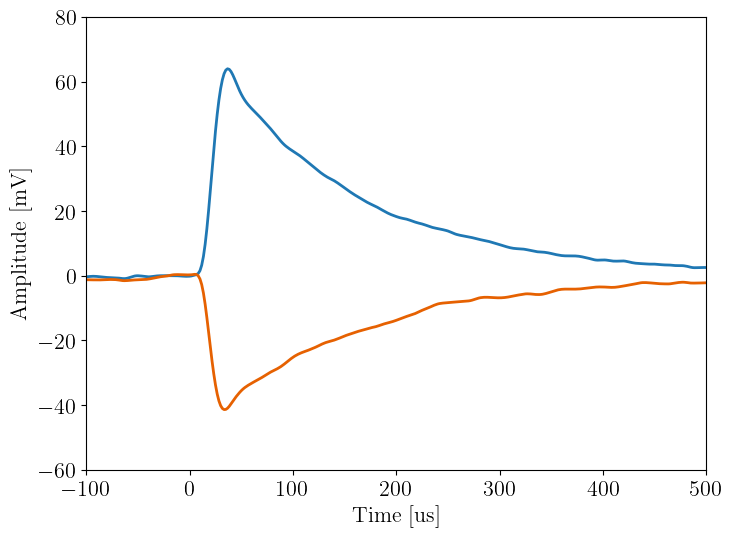

In [64]:
D1 = Dataset.Dataset(Path='C:/Data/20210610/', Selection='*.h5')
D1.RunStandardAnalysis()
D1.ShowAmplitudeVsTime(YTicks=20, YMax=100)
plt.savefig('20210603_cc.png')
D1.ShowDrifttimeVsTime()

cc = np.mean(D1.ChargeCollection[-100:])
cc_err = np.std(D1.ChargeCollection[-100:])/np.sqrt(len(D1.ChargeCollection[-100:]))
dtime = np.mean(D1.DriftTime[-100:])
lifetime = -dtime/np.log(cc)
lifetime_hi =  -dtime/np.log(cc+cc_err)
lifetime_lo =  -dtime/np.log(cc-cc_err)
print("Charge Collection [%]: {:.2f} +- {:.2f}".format(cc*100, cc_err*100))
print("Drift time [us]: {:.2f}".format(dtime))
print("Electron lifetime [us]: {:.2f}  - {:.2f}".format(lifetime_lo, lifetime_hi))


plt.figure()
plt.xlabel('Time [us]')
plt.ylabel('Amplitude [mV]')
plt.plot(D1.Ch[0].Time, np.mean(D1.Ch[0].Amp[-50:],axis=0))
plt.plot(D1.Ch[0].Time, np.mean(D1.Ch[1].Amp[-50:],axis=0)*-1)
plt.xlim(-100,500)
plt.show()

Charge Collection [%]: 152.71 +- 2.32
Drift time [us]: 20.67
Electron lifetime [us]: -50.65  - -47.15


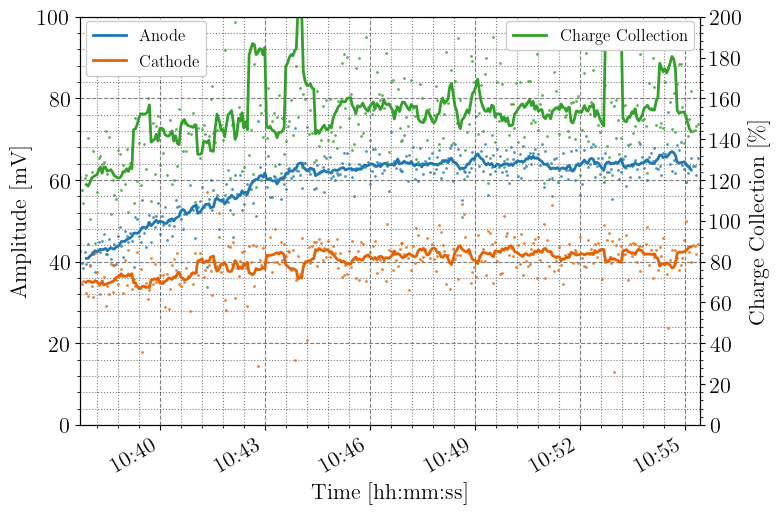

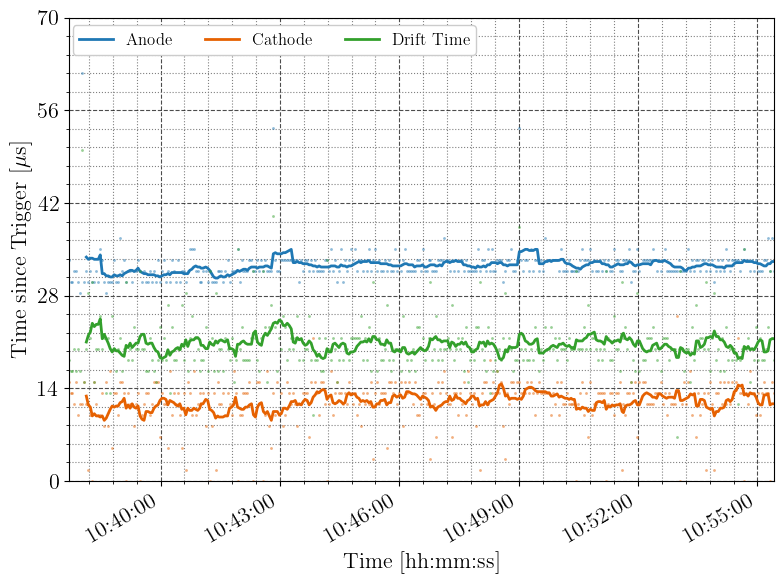

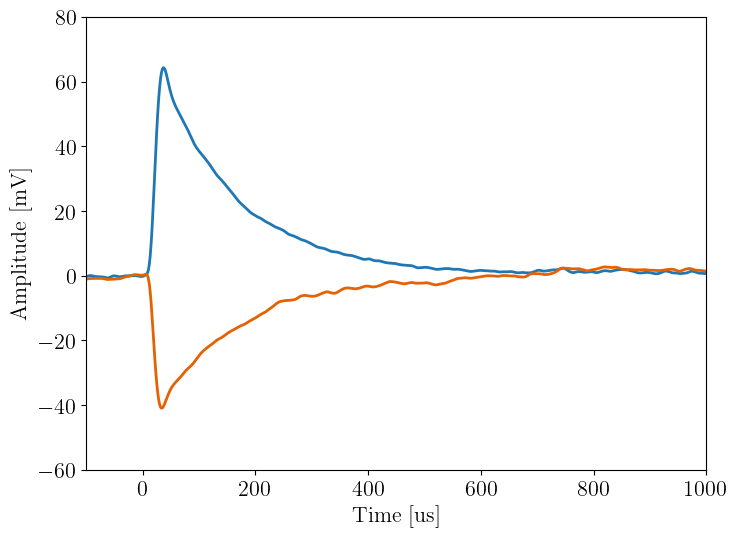

In [63]:
D2 = Dataset.Dataset(Path='C:/Data/20210610/', Selection='Collection*.h5')
D2.RunStandardAnalysis()
D2.ShowAmplitudeVsTime(YTicks=20, YMax=100)
plt.savefig('20210603_cc.png')
D2.ShowDrifttimeVsTime()

cc = np.mean(D2.ChargeCollection)
cc_err = np.std(D2.ChargeCollection)/np.sqrt(len(D2.ChargeCollection))
dtime = np.mean(D2.DriftTime)
lifetime = -dtime/np.log(cc)
lifetime_hi =  -dtime/np.log(cc+cc_err)
lifetime_lo =  -dtime/np.log(cc-cc_err)
print("Charge Collection [%]: {:.2f} +- {:.2f}".format(cc*100, cc_err*100))
print("Drift time [us]: {:.2f}".format(dtime))
print("Electron lifetime [us]: {:.2f}  - {:.2f}".format(lifetime_lo, lifetime_hi))


plt.figure()
plt.xlabel('Time [us]')
plt.ylabel('Amplitude [mV]')
plt.plot(D2.Ch[0].Time, np.mean(D2.Ch[0].Amp[-50:],axis=0))
plt.plot(D2.Ch[0].Time, np.mean(D2.Ch[1].Amp[-50:],axis=0)*-1)
plt.xlim(-100,1000)
plt.show()

In [4]:
# from scipy.optimize import curve_fit

# def gauss(x,a,b,c):
#     return a*np.exp(-(x-b)**2/(2*c**2))

# plt.figure()
# plt.xlabel('Charge Collection')
# plt.xlim(0.5,1.5)
# hist = plt.hist(D1.ChargeCollection, bins=np.linspace(0,2,50), histtype='step', lw=2, align='left')
# plt.vlines(x=np.mean(D1.ChargeCollection), ymin=0, ymax=700, color=colors[1], ls='--', label='Mean')
# plt.vlines(x=np.median(D1.ChargeCollection), ymin=0, ymax=700, color=colors[2], ls='--', label='Median')

# popt,pcov = curve_fit(gauss, hist[1][:-1], hist[0])
# xfit = np.linspace(0,2,1000)
# plt.plot(xfit, gauss(xfit, *popt), color=colors[3])

# plt.vlines(x=popt[1], ymin=0, ymax=700, color=colors[3], ls='--', label='Gauss fit')
# err = np.sqrt(np.diag(pcov)) 

# print(popt[1], err[1])
# print(popt[2])

# cc = popt[1]
# cc_err = popt[2]
# dtime = np.mean(D1.DriftTime)
# lifetime = -dtime/np.log(cc)
# lifetime_hi =  -dtime/np.log(cc+cc_err)
# lifetime_lo =  -dtime/np.log(cc-cc_err)
# print("Charge Collection [%]: {:.2f} +- {:.2f}".format(cc*100, cc_err*100))
# print("Drift time [us]: {:.2f}".format(dtime))
# print("Electron lifetime mean [us]: {:.2f}".format(lifetime))
# print("Electron lifetime range [us]: {:.2f}  - {:.2f}".format(lifetime_lo, lifetime_hi))

# plt.legend(loc='upper left')
# plt.show()

15 138.06 26.69998796992479 1.8726600197843026
35 140.99 22.58092753623189 2.2142580245994434
50 147.69 20.55226666666667 2.432821683901856
65 155.75 20.49480459770118 2.439642679277279
80 152.43 21.031117241379338 2.3774295690589153
100 154.82 20.719954716981153 2.413132686965876
200 152.07 20.535929411764748 2.4347571029025694
300 146.79 20.160172549019652 2.4801375027135566
400 142.83 20.1610929577465 2.48002427769118
500 135.4 19.462294339622648 2.5690701788538175


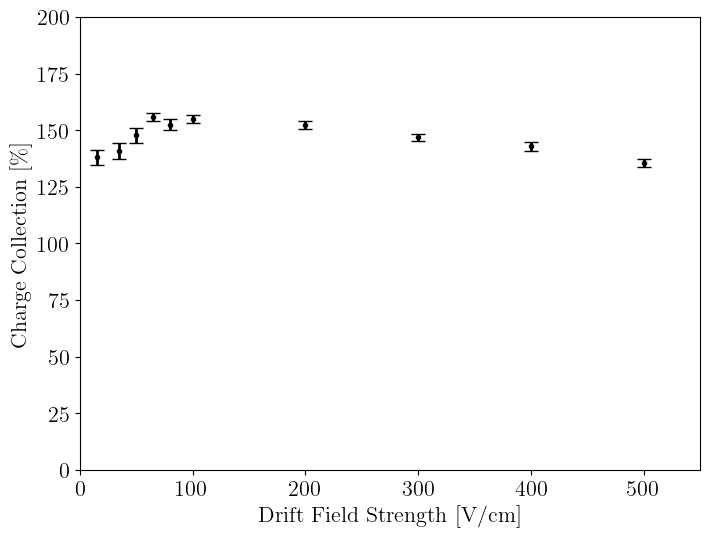

In [107]:
field = [15,35,50,65,80,100,200,300,400,500]
plt.figure()
cc = [] 
cc_err = []
dtime = [] 
for fl in field: 
    color = 'k'
    # if fl in [200,300, 460, 500]:
    #     color = 'r'
    D4 = Dataset.Dataset(Path='C:/Data/20210610/', Selection='FieldDependence_C-{}V*.h5'.format(fl))
    D4.RunStandardAnalysis()
    D4.ShowDrifttimeVsTime()
    plt.close()
    dtime.append(np.mean(D4.DriftTime))
    print(fl, np.round(np.mean(D4.ChargeCollection)*100.0,2), np.mean(D4.DriftTime), 50.0/np.mean(D4.DriftTime))
    cc.append(np.mean(D4.ChargeCollection))
    cc_err.append(np.std(D4.ChargeCollection)/np.sqrt(len(D4.ChargeCollection)))
    plt.errorbar(fl, np.mean(D4.ChargeCollection)*100.0, yerr=np.std(D4.ChargeCollection)/np.sqrt(len(D4.ChargeCollection))*100.0, color=color, marker='o',ms=3)
plt.xlabel('Drift Field Strength [V/cm]')
plt.ylabel('Charge Collection [\%]')
plt.xlim(0,550)
plt.ylim(0,200)
plt.savefig('20210603_field_vs_cc.png')
plt.show()


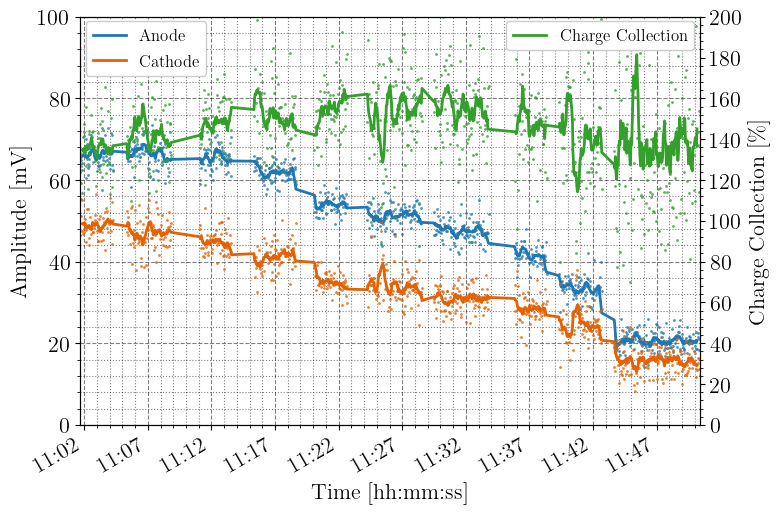

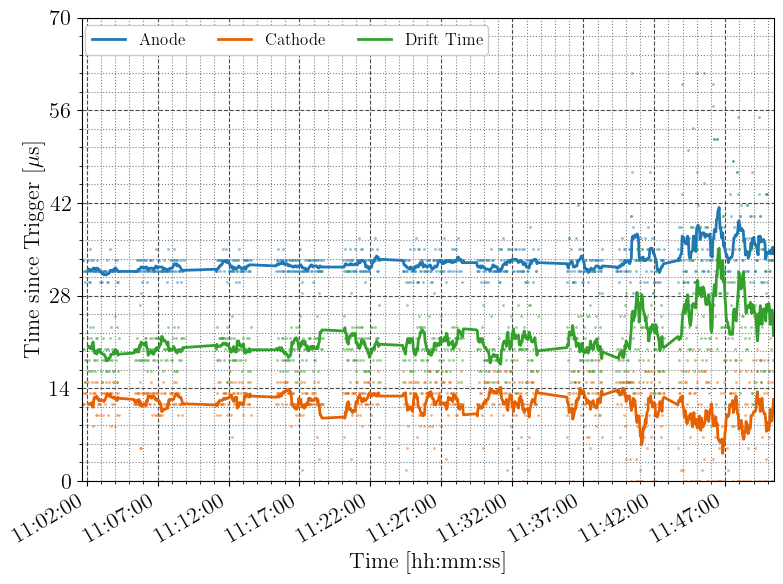

In [108]:
D4 = Dataset.Dataset(Path='C:/Data/20210610/', Selection='FieldDependence*')
D4.RunStandardAnalysis()
D4.ShowAmplitudeVsTime(YTicks=20, YMax=100)
D4.ShowDrifttimeVsTime()

In [6]:
delta = dt.datetime(2021,6,10,0,0) - dt.datetime(2021,6,3,0,0)
capdata_last = pd.read_csv("C:/Data/LevelMeter/20210603_liquefaction_12.csv", names=['Time', 'Level'])
timestamp_last = np.array([dt.datetime.strptime(x, "%m/%d/%Y %I:%M:%S %p") + delta for x in capdata_last['Time']])
cap_last = np.array(capdata_last['Level'])

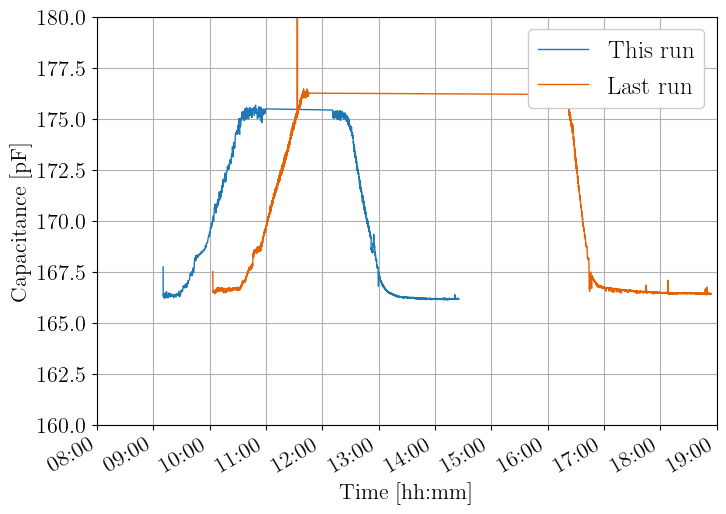

In [156]:
capdata = pd.read_csv("C:/Data/LevelMeter/20210610_liquefaction_13.csv", names=['Time', 'Level'])
timestamp = np.array([dt.datetime.strptime(x, "%m/%d/%Y %I:%M:%S %p") for x in capdata['Time']])
cap = np.array(capdata['Level'])
formatter = matplotlib.dates.DateFormatter('%H:%M')

fig = plt.figure()
ax = fig.gca()

XRange = [dt.datetime(2021,6,10,8,0), dt.datetime(2021,6,10,19,0)]

plt.gcf().axes[0].xaxis.set_major_formatter(formatter)
plt.gcf().autofmt_xdate()
plt.grid()
plt.xlabel('Time [hh:mm]')
plt.ylabel('Capacitance [pF]')

plt.xlim(XRange[0], XRange[1])
ax.xaxis.set_major_locator(matplotlib.dates.MinuteLocator(interval=60))

cut = np.where((timestamp>XRange[0]) & (cap>0) & (cap<300))
plt.plot(timestamp[cut][::10], cap[cut][::10], lw=1, label='This run')

cut_last = np.where((timestamp_last>XRange[0]) & (cap_last>0))
plt.plot(timestamp_last[cut_last][::10], cap_last[cut_last][::10], lw=1, label='Last run')
             
plt.ylim(160,180)
plt.legend(loc='upper right', fontsize=18)
plt.show() 